Critical Transition Analysis
============================

Based from the concept of pre-bifurcation structure from [Bargaje et al., PNAS, 2017](https://doi.org/10.1073/pnas.1621412114).
This study proposes the idea that a signature indicating the flattening
of the quasi-potential landscape can be detected prior to bifurcation. 

To detect this signal, the authors proposed a measurement, called **critical transition index**, is calculated as following:

$$\frac{<{\left | R(g_i,g_j) \right |>}}{<\left | R(c_k,c_l) \right |>}$$

Which is the ratio between the mean of the absolute all pairs of gene to gene correlations to the mean of the absolute of all pairs of cell t cell correlations.

While authors applied this calculation on groups of differentiating cells for each timepoint they sampled, we propose here to compute this signal lcoally on a moving window of cells along the pseudotine axis.

## Loading data

Here will use the pancreas dataset that we used in the CellRank conversion notebook. It has been already processed with annotated tree and tested associated features.

In [1]:
import scFates as scf
import scanpy as sc
adata=scf.datasets.pancreas()

  0%|          | 0.00/34.7M [00:00<?, ?B/s]

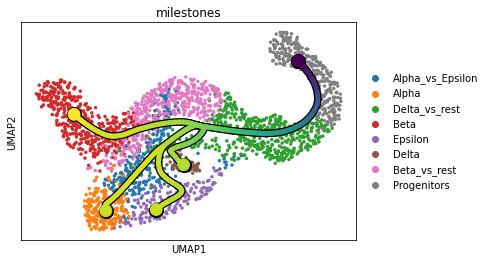

In [2]:
scf.pl.trajectory(adata,color_cells="milestones")

## Calculation of the local critical transition index

Let's estimate the local critical transition index along the trajectory, using the following function:


In [3]:
scf.tl.critical_transition(adata,"Progenitors",["Delta_vs_rest"],n_jobs=20)

Calculating local critical transition index
    leave Delta_vs_rest: 100%|██████████| 22/22 [00:00<00:00, 51.46it/s]
    finished (0:00:06) --> added 
    .uns['Progenitors->Delta_vs_rest']['critical transition'], df containing local critical transition index per window of cells.
    .obs['Progenitors->Delta_vs_rest CI'], local critical transition index projected onto cells.
    .obs['Progenitors->Delta_vs_rest CI fitted'], GAM fit of local critical transition index projected onto cells.


<div class="alert alert-warning">
    
**Warning**

A key parameter to consider is the size of the window and the step size for the sliding, by default these are `w=100` and `step=30`. These would require some tuning depending on the number of cells analysed.

</div>

## Visualisation of the local critical transition index

The previous function generate two type of data: overview loess fit over the sliding window of cells, in:

`adata.uns['Progenitors->Delta_vs_rest']['critical transition']`

And a GAM fit a the cell level:

`adata.obs['Progenitors->Delta_vs_rest CI fit']`

The latter will be useful to extrract correlated features

### Sliding window Loess fit

An overview of the trends can be visualised along the pseudotime axis, one can focus on both branches but also only on the pre-bifurcation branch, with the parameter `path`.

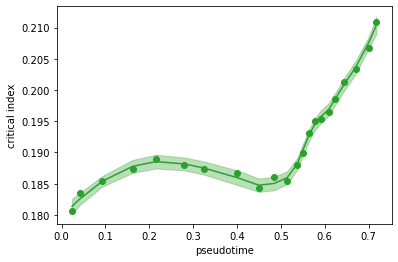

In [4]:
scf.pl.critical_transition(adata,"Progenitors",["Delta_vs_rest"])

### Projection onto cells

We can also obtain a more granular view.

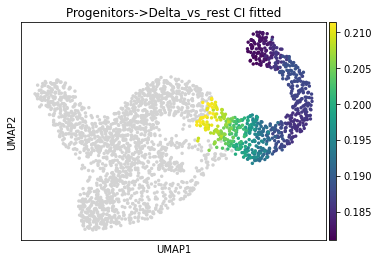

In [5]:
sc.pl.umap(adata,color='Progenitors->Delta_vs_rest CI fitted')

## Identification of potential drivers of the critical transition

Using the cell projected values, we can now find which genes are mostly correlated to the found critical index:

In [6]:
scf.tl.criticality_drivers(adata,"Progenitors",["Delta_vs_rest"])

Calculating gene to critical transition index correlations
    finished (0:00:00) --> added 
    .uns['Progenitors->Delta_vs_rest']['criticality drivers'], df containing gene correlation with critical index transition.


In [7]:
adata.uns['Progenitors->Delta_vs_rest']['criticality drivers']

,corr,pval,ci_low,ci_high,q_val
Runx1t1,0.795313,0.0,0.780537,0.809200,0.0
Chga,0.716314,0.0,0.696799,0.734769,0.0
Celf3,0.703070,0.0,0.682812,0.722247,0.0
Cck,0.697355,0.0,0.676781,0.716840,0.0
Tuba1a,0.688577,0.0,0.667524,0.708530,0.0
...,...,...,...,...,...
Vim,-0.652639,0.0,-0.674451,-0.629689,0.0
Spp1,-0.707421,0.0,-0.726363,-0.687406,0.0
Acot1,-0.713179,0.0,-0.731806,-0.693487,0.0
Sparc,-0.771217,0.0,-0.786545,-0.754940,0.0


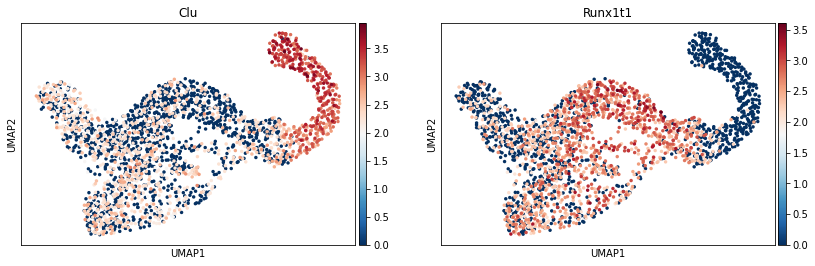

In [8]:
sc.pl.umap(adata,color=["Clu","Runx1t1"],cmap="RdBu_r")